# **Heart Disease Prediction using Logistic Regression**

# Importing the Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

# Exploratory Data Analysis

## Data Description

1. Age (in years)
2. Sex
        1 = male
        0 = Female
3. cp -chest pain type
4. trestbps - resting blood pressure (anything above 130-140 is typically cause for concern)
5. chol-serum cholestoral in mg/dl (above 200 is cause for concern)
6. fbs - fasting blood sugar ( > 120 mg/dl) (1 = true; 0 = false)
        1 = True
        0 = False
7. restecg - resting electrocardiographic results
        0 = normal
        1 = having ST-T wave abnormality
        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach-maximum heart rate achieved
9. exang - exercise induced angina
        1 = yes
        0 = no
10. oldpeak - depression induced by exercise relative to rest
11. slope -  slope of the peak exercise ST segment
        1 = upsloping
        2 = flat Value
        3 = downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal
        3 = normal
        6 = fixed defect
        7 = reversable defect
14. **num** (target) -  diagnosis of heart disease (angiographic disease status)  
        0 : < 50% diameter narrowing
        1 : > 50% diameter narrowing

## EDA

In [3]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol',  'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']

raw_data = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING MAY/DAY2_HEART_DISEASE_PREDICTION/processed.cleveland.data', header=None, names=columns)
df = raw_data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
for column in df:
  print(df[column].value_counts())
  print('\n')

age
58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
64.0    10
41.0    10
67.0     9
63.0     9
42.0     8
43.0     8
45.0     8
53.0     8
55.0     8
61.0     8
65.0     8
50.0     7
66.0     7
48.0     7
46.0     7
47.0     5
49.0     5
70.0     4
68.0     4
35.0     4
39.0     4
69.0     3
71.0     3
40.0     3
34.0     2
37.0     2
38.0     2
29.0     1
77.0     1
74.0     1
76.0     1
Name: count, dtype: int64


sex
1.0    206
0.0     97
Name: count, dtype: int64


cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64


trestbps
120.0    37
130.0    36
140.0    32
110.0    19
150.0    17
138.0    12
128.0    12
160.0    11
125.0    11
112.0     9
132.0     8
118.0     7
124.0     6
108.0     6
135.0     6
152.0     5
134.0     5
145.0     5
100.0     4
170.0     4
122.0     4
126.0     3
136.0     3
115.0     3
180.0     3
142.0     3
105.0     3
102.0     2
146.0     2
144.0     2
148.0     2
178.0  

## Visualizing Features

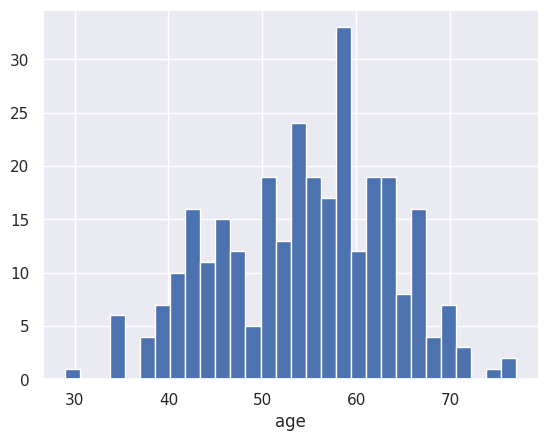

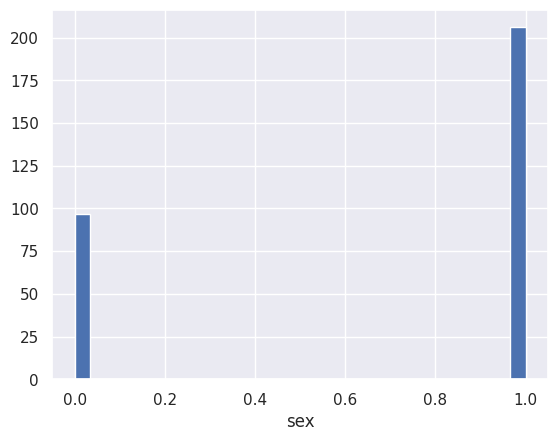

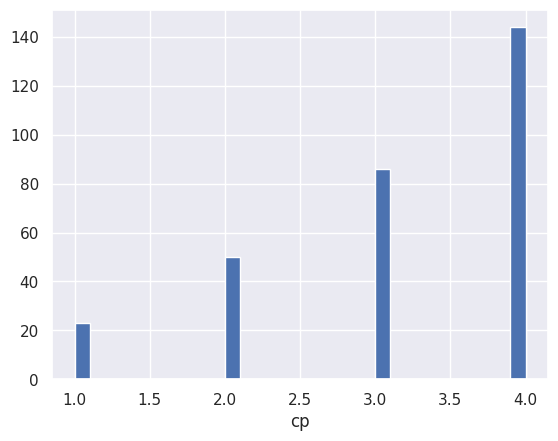

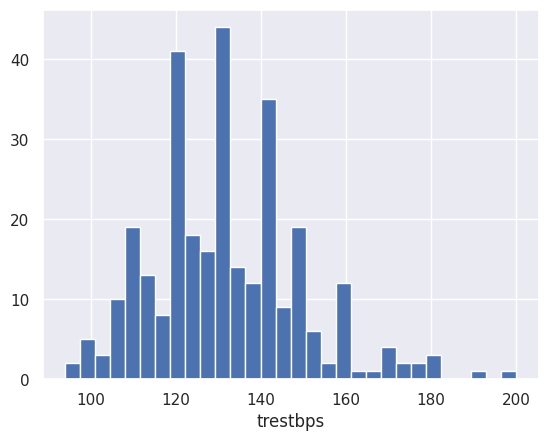

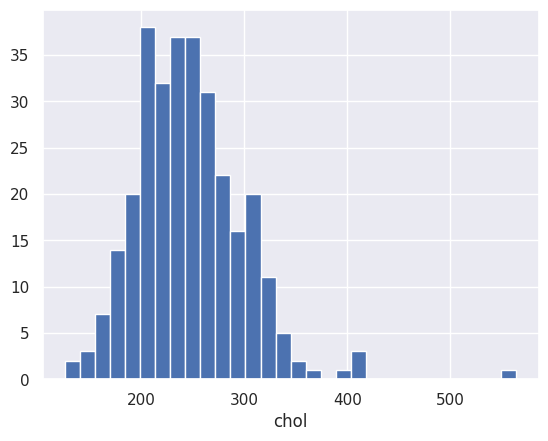

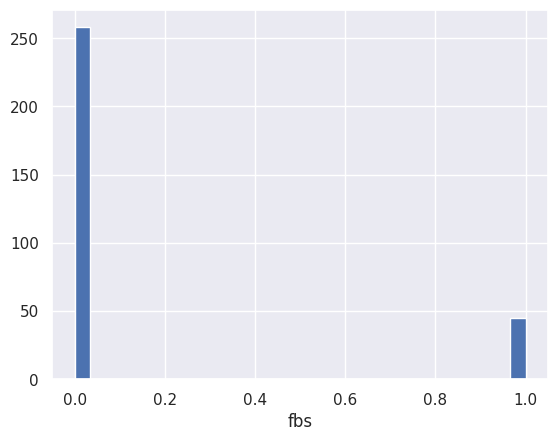

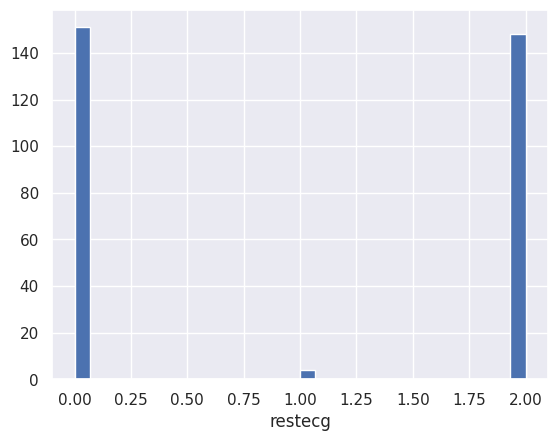

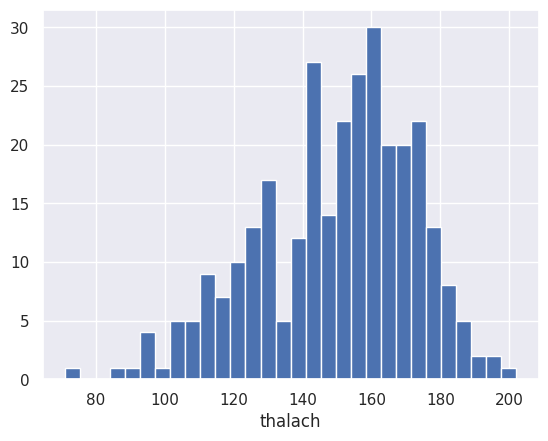

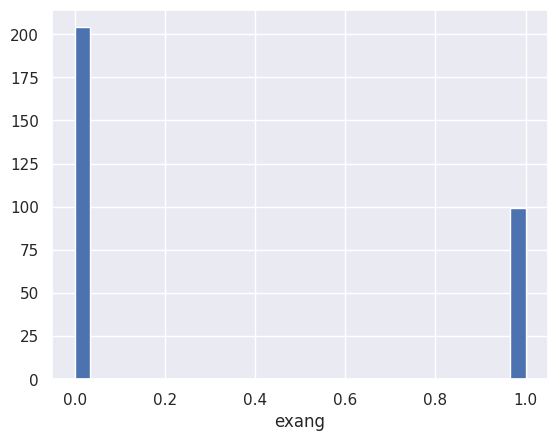

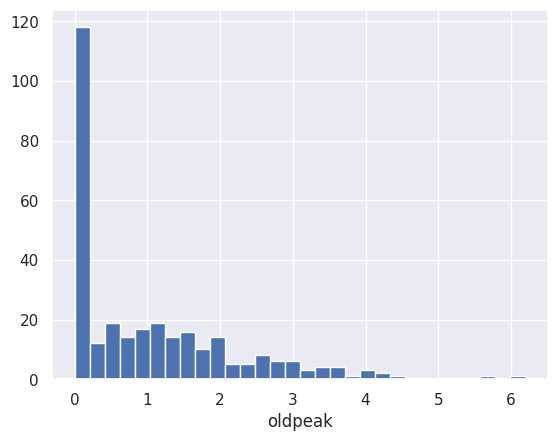

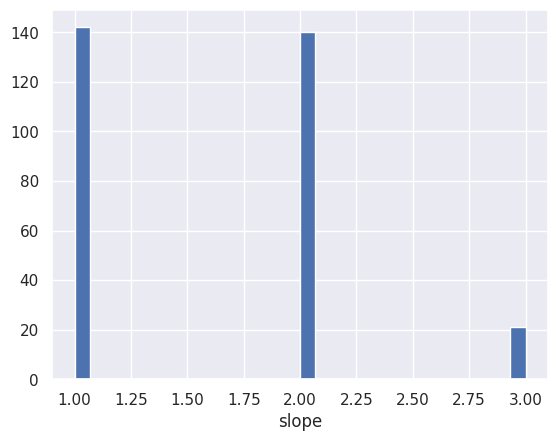

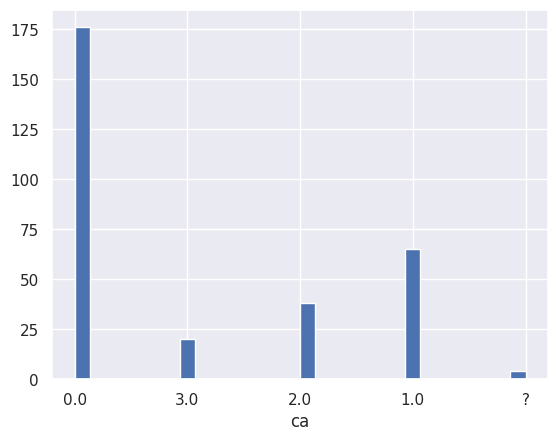

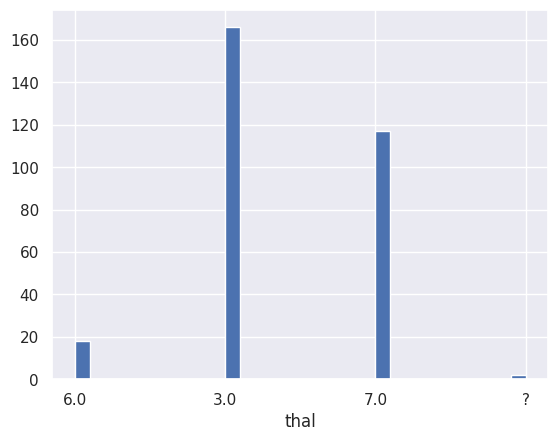

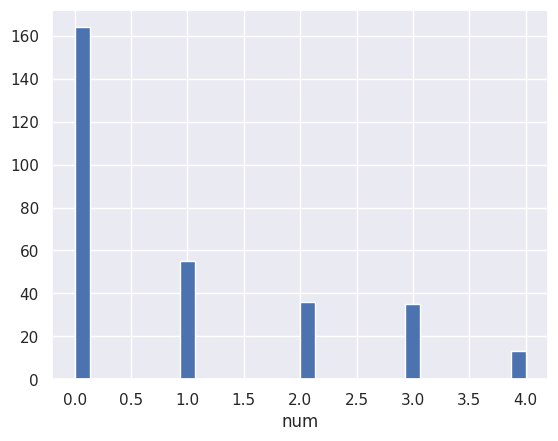

<Figure size 640x480 with 0 Axes>

In [6]:
sns.set()
for column in df:
  plt.hist(x = df[column], bins = 30)
  plt.xlabel(column)
  plt.show()
  print('\n')
plt.tight_layout()

Observations:
1. As we can see, the features 'ca' and 'thal' contain '?' value which represents missing value. We need to impute these values.
2. In the target variable 'num', we are only interested in 0 and 1 values (as given in data description). Hence, labels with values of 2,3,4 will have to be converted to 1.
3. Continuous numerical features: age, trestbps, chol, thalach, oldpeak
4. Discrete numerical features: sex, cp, fbs, restecg, exang, slope, ca, thal


# Creating Pipeline

In [7]:
class preprocessor:

  def train_test_split(self,df):

    # Replace '?' values with np.nan
    df.replace('?',np.nan,inplace=True)

    # Change values 2,3,4 to 1 in target variable 'num'
    df['num'].replace([2,3,4],1,inplace=True)
    X = df.drop('num',axis=1)
    y = df['num']

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=0)
    return X_train, X_test, y_train, y_test

  def pipeline(self):

    #Continuous and Discrete Numerical Variables
    continuous_numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    discrete_numerical_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']

    continuous_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler()),
        ('pca',PCA())
    ])

    discrete_numerical_transformer = Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('continuous_num',continuous_numerical_transformer,continuous_numerical_columns),
        ('discrete_num',discrete_numerical_transformer,discrete_numerical_columns),
        ])

    pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LogisticRegression(max_iter=1000))
    ])

    return pipe

# Logistic Regressor without CV

In [8]:
pp = preprocessor()
X_train, X_test, y_train, y_test = pp.train_test_split(df)
pipe = pp.pipeline()
pipe.fit(X_train,y_train)
print(f"Score on test data : {pipe.score(X_test,y_test):.3f}")

Score on test data : 0.791


Let us plot the Confusion Matrix.

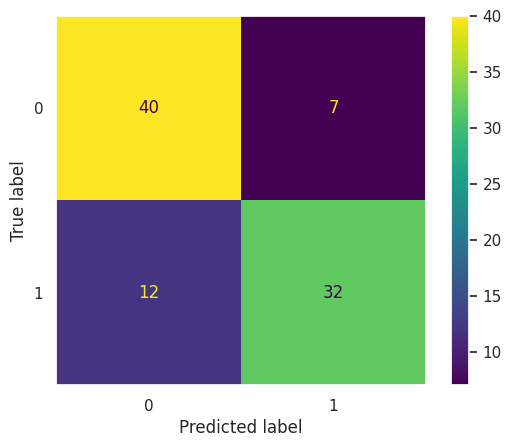

In [9]:
y_test_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test,y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot()
plt.grid(False)

In [10]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        47
           1       0.82      0.73      0.77        44

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



# Logistic Regressor with CV

Since some of the solver functions use only L2 regularization, I have considered two separate param-grids.

### CASE1

In [11]:
param_grid1 = {'regressor__C' : np.logspace(-4,4,20),
              'regressor__solver' : ['lbfgs','newton-cg','sag','newton-cholesky'],
              'regressor__penalty' : ['l2'],
              'regressor__warm_start' : [True]}

random_search1 = RandomizedSearchCV(pipe, param_grid1, n_jobs=-1, n_iter=80, cv=5, verbose=True, random_state=0)
random_search1.fit(X_train,y_train)
print(f"Best parameters for random_search1 : \n{random_search1.best_params_}")
print(f"Best CV score for random_search1 : {random_search1.best_score_:.3f}")
print(f"Score on test data : {random_search1.score(X_test,y_test):.3f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for random_search1 : 
{'regressor__warm_start': True, 'regressor__solver': 'lbfgs', 'regressor__penalty': 'l2', 'regressor__C': 0.08858667904100823}
Best CV score for random_search1 : 0.873
Score on test data : 0.780


### CASE2

In [12]:
param_grid2 = {'regressor__C' : np.logspace(-4,4,20),
              'regressor__solver' : ['liblinear','saga'],
              'regressor__penalty' : ['l1','l2'],
              'regressor__warm_start' : [True]}

random_search2 = RandomizedSearchCV(pipe, param_grid2, n_jobs=-1, n_iter=80, cv=5, verbose=True, random_state=0)
random_search2.fit(X_train,y_train)
print(f"Best parameters for random_search2 : \n{random_search2.best_params_}")
print(f"Best CV score for random_search2 : {random_search2.best_score_:.3f}")
print(f"Score on test data : {random_search2.score(X_test,y_test):.3f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters for random_search2 : 
{'regressor__warm_start': True, 'regressor__solver': 'liblinear', 'regressor__penalty': 'l2', 'regressor__C': 0.08858667904100823}
Best CV score for random_search2 : 0.873
Score on test data : 0.780


# ROC-AUC Curves

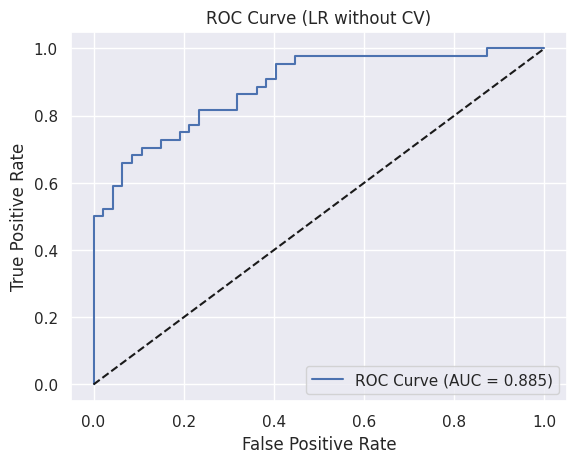

In [13]:
y_test_prob = pipe.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LR without CV)')
plt.legend(loc='lower right')
plt.show()

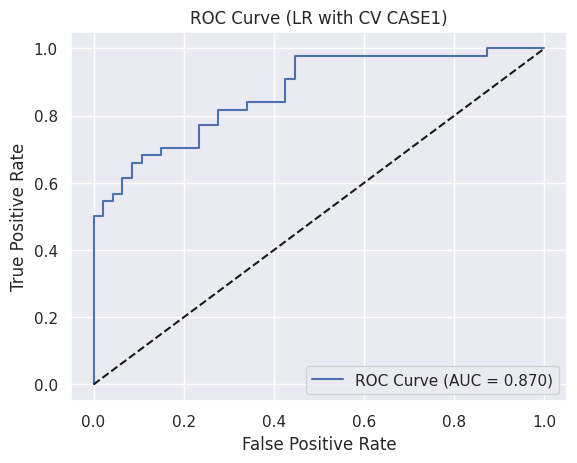

In [14]:
y_test_prob = random_search1.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LR with CV CASE1)')
plt.legend(loc='lower right')
plt.show()

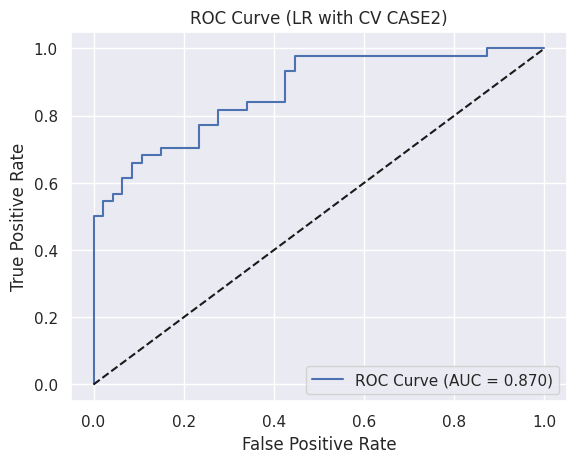

In [15]:
y_test_prob = random_search2.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LR with CV CASE2)')
plt.legend(loc='lower right')
plt.show()

From the three ROC Curves, the AUC Score for first model is the highest. One possibility can be that the plain Logistic Regressor could be overfitted, leading to higher AUC score than the one with CV.